<a href="https://colab.research.google.com/github/kavlartius217/AWS-langchain-working/blob/main/Titanic_Competitive_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Shows stats for the object type columns

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


#Group By's

as_index makes sure Pclass doesnt become the index as a result we get a regular dataframe as an output

In [ ]:
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
train_df['Family_Size']=train_df['SibSp']+train_df['Parch']+1
test_df['Family_Size']=test_df['SibSp']+test_df['Parch']+1

sum(survived)/number of records

In [ ]:
train_df.groupby(['Family_Size'],as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


converting a numerical column to a categorical column by mapping lables

In [ ]:
family_map={1:"Alone",2:"Small",3:"Small",4:"Small",5:"Medium",6:"Medium",7:"Large",8:"Large",11:"Large"}
train_df['Family_Size_Grouped']=train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped']=test_df['Family_Size'].map(family_map)

In [ ]:
train_df.groupby(['Family_Size_Grouped'],as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [ ]:
train_df.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


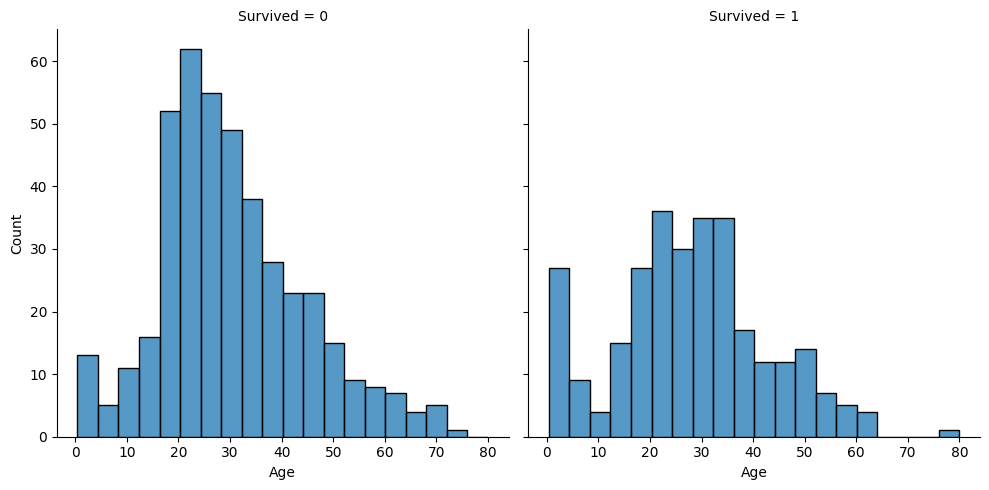

In [ ]:
sns.displot(data=train_df,x='Age',col='Survived')

dividing Age

In [ ]:
train_df['Age_Cut']=pd.qcut(train_df['Age'],8)
test_df['Age_Cut']=pd.qcut(test_df['Age'],8)

In [ ]:
train_df.groupby(['Age'],as_index=False)['Survived'].mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


This way we find which age groups had a higher chance of survival

In [ ]:
train_df.groupby(['Age_Cut'],as_index=False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [ ]:
train_df['Age_map']=pd.cut(
    train_df['Age'],
    bins=[0.419, 16.0, 20.125, 24.0, 28.0, 32.312, 38.0, 47.0, 80.0],
    labels=[1, 2, 3, 4, 5, 6, 7, 8]
)

test_df['Age_map']=pd.cut(
    test_df['Age'],
    bins=[0.419, 16.0, 20.125, 24.0, 28.0, 32.312, 38.0, 47.0, 80.0],
    labels=[1, 2, 3, 4, 5, 6, 7, 8]
)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Age_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]",3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]",6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]",4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]",6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]",6


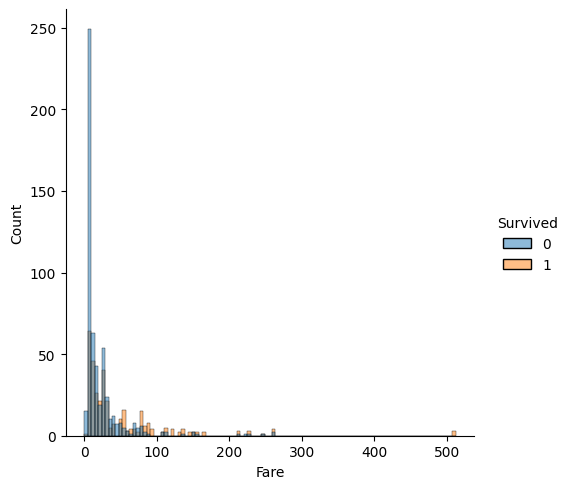

In [ ]:
sns.displot(data=train_df,x="Fare",hue='Survived')

It is better to divide this into buckets

In [ ]:
train_df.groupby(['Fare'],as_index=False)['Survived'].mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
243,227.5250,0.750000
244,247.5208,0.500000
245,262.3750,1.000000
246,263.0000,0.500000


In [ ]:
train_df['Fare_Cut']=pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut']=pd.qcut(test_df['Fare'],6)

In [ ]:
train_df.groupby(['Fare_Cut'],as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [ ]:
train_df['fare_map'] = pd.cut(
    train_df['Fare'],
    bins=[-0.001, 7.775, 8.662, 14.454, 26.0, 52.369, 512.329],
    labels=[1, 2, 3, 4, 5, 6]
)

test_df['fare_map'] = pd.cut(
    test_df['Fare'],
    bins=[-0.001, 7.775, 8.662, 14.454, 26.0, 52.369, 512.329],
    labels=[1, 2, 3, 4, 5, 6]
)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Age_map,Fare_Cut,fare_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]",3,"(-0.001, 7.775]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]",4,"(7.775, 8.662]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]",6,"(7.775, 8.662]",2


In [ ]:
train_df['Title']=train_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0]

In [ ]:
test_df['Title']=test_df['Name'].str.split(pat=',',expand=True)[1].str.split(pat='.',expand=True)[0]

In [ ]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [ ]:
train_df['Title']=train_df['Title'].apply(lambda x:x.strip())
test_df['Title']=test_df['Title'].apply(lambda x:x.strip())

In [ ]:
train_df['Title']=train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

test_df['Title']=test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'
})

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Age_map,Fare_Cut,fare_map,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]",3,"(-0.001, 7.775]",1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]",4,"(7.775, 8.662]",2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]",6,"(7.775, 8.662]",2,Mr


we can also plot based on conditions

In [ ]:
train_df['Name_Length']=train_df['Name'].apply(lambda x:len(x))
test_df['Name_Length']=test_df['Name'].apply(lambda x:len(x))

Text(0, 0.5, 'Frequency')

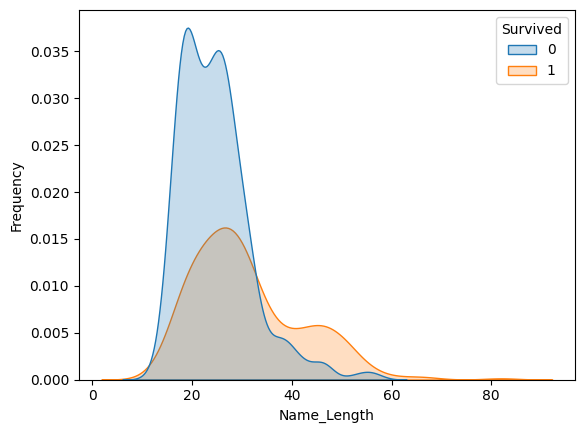

In [ ]:
sns.kdeplot(data=train_df,x="Name_Length",hue='Survived',fill=True)
plt.ylabel('Frequency')

In [ ]:
pd.qcut(train_df['Name_Length'],8)

,Name_Length
0,"(20.0, 23.0]"
1,"(38.0, 82.0]"
2,"(20.0, 23.0]"
3,"(38.0, 82.0]"
4,"(23.0, 25.0]"
...,...
886,"(20.0, 23.0]"
887,"(27.25, 30.0]"
888,"(38.0, 82.0]"
889,"(20.0, 23.0]"


In [ ]:
train_df['Name_Size']=pd.cut(
    train_df['Name_Length'],
    bins=[11.999, 18.0, 20.0, 23.0, 25.0, 27.25, 30.0, 38.0, 82.0],
    labels=[1,2,3,4,5,6,7,8]
)

test_df['Name_Size']=pd.cut(
    test_df['Name_Length'],
    bins=[11.999, 18.0, 20.0, 23.0, 25.0, 27.25, 30.0, 38.0, 82.0],
    labels=[1,2,3,4,5,6,7,8]
)

In [ ]:
train_df.groupby(['Name_Size'],as_index=False)['Survived'].mean()

,Name_Size,Survived
0,1,0.214286
1,2,0.252427
2,3,0.307692
3,4,0.346939
4,5,0.292929
5,6,0.428571
6,7,0.517241
7,8,0.745283


In [ ]:
train_df['TicketNumber']=train_df['Ticket'].str.split(pat=" ").apply(lambda x: list(x)[-1])
test_df['TicketNumber']=test_df['Ticket'].str.split(pat=" ").apply(lambda x: list(x)[-1])

In [ ]:
train_df['TicketNumber_frequency']=train_df.groupby(['TicketNumber'],as_index=False)['TicketNumber'].transform('count')
test_df['TicketNumber_frequency']=test_df.groupby(['TicketNumber'],as_index=False)['TicketNumber'].transform('count')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size_Grouped,Age_Cut,Age_map,Fare_Cut,fare_map,Title,Name_Length,Name_Size,TicketNumber,TicketNumber_frequency
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Small,"(20.125, 24.0]",3,"(-0.001, 7.775]",1,Mr,23,3,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,51,8,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Alone,"(24.0, 28.0]",4,"(7.775, 8.662]",2,Miss,22,3,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Small,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,44,8,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Alone,"(32.312, 38.0]",6,"(7.775, 8.662]",2,Mr,24,4,373450,1


In [ ]:
train_df.groupby(['TicketNumber_frequency','TicketNumber'],as_index=False)['Survived'].mean()

,TicketNumber_frequency,TicketNumber,Survived
0,1,10482,1.000000
1,1,110564,1.000000
2,1,110813,1.000000
3,1,111240,0.000000
4,1,111320,0.000000
...,...,...,...
674,6,3101295,0.000000
675,6,347088,0.000000
676,7,1601,0.714286
677,7,2343,0.000000


In [ ]:
train_df['Ticket'].str.split(pat=" ",expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [ ]:
x=train_df['Ticket'].str.split(pat=" ",expand=True)
y=test_df['Ticket'].str.split(pat=" ",expand=True)

In [ ]:
for value in range (len(x[1])):
  if x[1][value] is None:
    x[0][value]="Blank"


for value in range (len(y[1])):
  if y[1][value] is None:
    y[0][value]="Blank"

In [ ]:
train_df['TicketLocation']=x[0]
test_df['TicketLocation']=y[0]

In [ ]:
train_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [ ]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
})


test_df['TicketLocation']=test_df['TicketLocation'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
})

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Age_map,Fare_Cut,fare_map,Title,Name_Length,Name_Size,TicketNumber,TicketNumber_frequency,TicketLocation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(20.125, 24.0]",3,"(-0.001, 7.775]",1,Mr,23,3,21171,1,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,51,8,17599,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(24.0, 28.0]",4,"(7.775, 8.662]",2,Miss,22,3,3101282,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,44,8,113803,2,Blank
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(32.312, 38.0]",6,"(7.775, 8.662]",2,Mr,24,4,373450,1,Blank


In [ ]:
train_df.groupby(['TicketLocation'],as_index=False)['Survived'].mean()

,TicketLocation,Survived
0,A/4,0.000000
1,A/5,0.095238
2,A/S,0.000000
3,A4.,0.000000
4,Blank,0.383459
5,C,0.400000
6,C.A./SOTON,0.000000
7,CA,0.341463
8,F.C.,0.000000
9,F.C.C.,0.800000


In [ ]:
train_df['Cabin']=train_df['Cabin'].fillna('U').apply(lambda x:list(x)[0])
test_df['Cabin']=test_df['Cabin'].fillna('U').apply(lambda x:list(x)[0])

In [ ]:
 train_df['Cabin'].value_counts()

,count
Cabin,
U,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [ ]:
train_df.groupby(['Cabin'],as_index=False)['Survived'].agg(['mean','count'])

,Cabin,mean,count
0,A,0.466667,15
1,B,0.744681,47
2,C,0.593220,59
3,D,0.757576,33
4,E,0.750000,32
5,F,0.615385,13
6,G,0.500000,4
7,T,0.000000,1
8,U,0.299854,687


In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Age_map', 'Fare_Cut', 'fare_map',
       'Title', 'Name_Length', 'Name_Size', 'TicketNumber',
       'TicketNumber_frequency', 'TicketLocation'],
      dtype='object')

#PART 2

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Age_map,Fare_Cut,fare_map,Title,Name_Length,Name_Size,TicketNumber,TicketNumber_frequency,TicketLocation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(20.125, 24.0]",3,"(-0.001, 7.775]",1,Mr,23,3,21171,1,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,51,8,17599,1,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(24.0, 28.0]",4,"(7.775, 8.662]",2,Miss,22,3,3101282,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(32.312, 38.0]",6,"(52.369, 512.329]",6,Mrs,44,8,113803,2,Blank
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(32.312, 38.0]",6,"(7.775, 8.662]",2,Mr,24,4,373450,1,Blank


In [ ]:
train_df['Cabin_Assigned']=train_df['Cabin'].apply(lambda x:"Not Assigned" if x=='U' else "Assigned")
test_df['Cabin_Assigned']=test_df['Cabin'].apply(lambda x:"Not Assigned" if x=='U' else "Assigned")

In [ ]:
train_df.groupby(['Cabin_Assigned'],as_index=False)['Survived'].mean()

,Cabin_Assigned,Survived
0,Assigned,0.666667
1,Not Assigned,0.299854


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             891 non-null    int64   
 1   Survived                891 non-null    int64   
 2   Pclass                  891 non-null    int64   
 3   Name                    891 non-null    object  
 4   Sex                     891 non-null    object  
 5   Age                     714 non-null    float64 
 6   SibSp                   891 non-null    int64   
 7   Parch                   891 non-null    int64   
 8   Ticket                  891 non-null    object  
 9   Fare                    891 non-null    float64 
 10  Cabin                   891 non-null    object  
 11  Embarked                889 non-null    object  
 12  Family_Size             891 non-null    int64   
 13  Family_Size_Grouped     891 non-null    object  
 14  Age_Cut                 71

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Age_map', 'Fare_Cut', 'fare_map',
       'Title', 'Name_Length', 'Name_Size', 'TicketNumber',
       'TicketNumber_frequency', 'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             418 non-null    int64   
 1   Pclass                  418 non-null    int64   
 2   Name                    418 non-null    object  
 3   Sex                     418 non-null    object  
 4   Age                     332 non-null    float64 
 5   SibSp                   418 non-null    int64   
 6   Parch                   418 non-null    int64   
 7   Ticket                  418 non-null    object  
 8   Fare                    417 non-null    float64 
 9   Cabin                   418 non-null    object  
 10  Embarked                418 non-null    object  
 11  Family_Size             418 non-null    int64   
 12  Family_Size_Grouped     418 non-null    object  
 13  Age_Cut                 332 non-null    category
 14  Age_map                 33

In [ ]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [ ]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [ ]:
train_df['Fare'].isna().sum()

np.int64(0)

#Data Preprocessing

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             891 non-null    int64   
 1   Survived                891 non-null    int64   
 2   Pclass                  891 non-null    int64   
 3   Name                    891 non-null    object  
 4   Sex                     891 non-null    object  
 5   Age                     891 non-null    float64 
 6   SibSp                   891 non-null    int64   
 7   Parch                   891 non-null    int64   
 8   Ticket                  891 non-null    object  
 9   Fare                    891 non-null    float64 
 10  Cabin                   891 non-null    object  
 11  Embarked                889 non-null    object  
 12  Family_Size             891 non-null    int64   
 13  Family_Size_Grouped     891 non-null    object  
 14  Age_Cut                 71

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             418 non-null    int64   
 1   Pclass                  418 non-null    int64   
 2   Name                    418 non-null    object  
 3   Sex                     418 non-null    object  
 4   Age                     418 non-null    float64 
 5   SibSp                   418 non-null    int64   
 6   Parch                   418 non-null    int64   
 7   Ticket                  418 non-null    object  
 8   Fare                    418 non-null    float64 
 9   Cabin                   418 non-null    object  
 10  Embarked                418 non-null    object  
 11  Family_Size             418 non-null    int64   
 12  Family_Size_Grouped     418 non-null    object  
 13  Age_Cut                 332 non-null    category
 14  Age_map                 33

In [ ]:
ode_cols=['Family_Size_Grouped']
ohe_cols=['Sex','Embarked']

In [ ]:
x=train_df.drop(['Survived','Age_Cut','Fare_Cut'],axis=1)
y=train_df['Survived']
x_unseen=test_df.drop(['Age_Cut','Fare_Cut'],axis=1)

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_Size_Grouped,Age_map,fare_map,Title,Name_Length,Name_Size,TicketNumber,TicketNumber_frequency,TicketLocation,Cabin_Assigned
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,...,Small,3,1,Mr,23,3,21171,1,A/5,Not Assigned
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,Small,6,6,Mrs,51,8,17599,1,PC,Assigned
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,...,Alone,4,2,Miss,22,3,3101282,1,STON/O2.,Not Assigned
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,...,Small,6,6,Mrs,44,8,113803,2,Blank,Assigned
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,...,Alone,6,2,Mr,24,4,373450,1,Blank,Not Assigned


In [ ]:
x.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
ohe_cols

['Sex', 'Embarked']

In [ ]:
ode_cols

['Family_Size_Grouped']

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_map', 'fare_map', 'Title', 'Name_Length',
       'Name_Size', 'TicketNumber', 'TicketNumber_frequency', 'TicketLocation',
       'Cabin_Assigned'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ohe_sex=OneHotEncoder(sparse_output=False)
ohe_embarked=OneHotEncoder(sparse_output=False)
oe_fam_grp=OrdinalEncoder()

In [ ]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_Size_Grouped,Age_map,fare_map,Title,Name_Length,Name_Size,TicketNumber,TicketNumber_frequency,TicketLocation,Cabin_Assigned
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,...,Small,3,1,Mr,23,3,21171,1,A/5,Not Assigned
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,Small,6,6,Mrs,51,8,17599,1,PC,Assigned
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,...,Alone,4,2,Miss,22,3,3101282,1,STON/O2.,Not Assigned
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,...,Small,6,6,Mrs,44,8,113803,2,Blank,Assigned
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,...,Alone,6,2,Mr,24,4,373450,1,Blank,Not Assigned


In [ ]:
ct=make_column_transformer(
    (ohe_sex,['Sex']),
    (ohe_embarked,['Embarked']),
    (oe_fam_grp,['Family_Size_Grouped']),
    remainder="passthrough"
).set_output(transform="pandas")

In [ ]:
x=ct.fit_transform(x)

In [ ]:
x.columns

Index(['onehotencoder-1__Sex_female', 'onehotencoder-1__Sex_male',
       'onehotencoder-2__Embarked_C', 'onehotencoder-2__Embarked_Q',
       'onehotencoder-2__Embarked_S', 'onehotencoder-2__Embarked_nan',
       'ordinalencoder__Family_Size_Grouped', 'remainder__PassengerId',
       'remainder__Pclass', 'remainder__Name', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Ticket',
       'remainder__Fare', 'remainder__Cabin', 'remainder__Family_Size',
       'remainder__Age_map', 'remainder__fare_map', 'remainder__Title',
       'remainder__Name_Length', 'remainder__Name_Size',
       'remainder__TicketNumber', 'remainder__TicketNumber_frequency',
       'remainder__TicketLocation', 'remainder__Cabin_Assigned'],
      dtype='object')

In [ ]:
selected_columns = [
    'onehotencoder-1__Sex_female',
    'onehotencoder-1__Sex_male',
    'onehotencoder-2__Embarked_C',
    'onehotencoder-2__Embarked_Q',
    'onehotencoder-2__Embarked_S',
    'onehotencoder-2__Embarked_nan',
    'ordinalencoder__Family_Size_Grouped',
    'remainder__Age',
    'remainder__Pclass',
    'remainder__TicketNumber_frequency',  # Assuming this is TicketNumberCounts
    'remainder__Cabin_Assigned',
    'remainder__Name_Size'
]

In [ ]:
x=x[selected_columns]

In [ ]:
x.columns

Index(['onehotencoder-1__Sex_female', 'onehotencoder-1__Sex_male',
       'onehotencoder-2__Embarked_C', 'onehotencoder-2__Embarked_Q',
       'onehotencoder-2__Embarked_S', 'onehotencoder-2__Embarked_nan',
       'ordinalencoder__Family_Size_Grouped', 'remainder__Age',
       'remainder__Pclass', 'remainder__TicketNumber_frequency',
       'remainder__Cabin_Assigned', 'remainder__Name_Size'],
      dtype='object')

In [ ]:
x.isna().sum()

,0
onehotencoder-1__Sex_female,0
onehotencoder-1__Sex_male,0
onehotencoder-2__Embarked_C,0
onehotencoder-2__Embarked_Q,0
onehotencoder-2__Embarked_S,0
onehotencoder-2__Embarked_nan,0
ordinalencoder__Family_Size_Grouped,0
remainder__Age,0
remainder__Pclass,0
remainder__TicketNumber_frequency,0


In [ ]:
x

,onehotencoder-1__Sex_female,onehotencoder-1__Sex_male,onehotencoder-2__Embarked_C,onehotencoder-2__Embarked_Q,onehotencoder-2__Embarked_S,onehotencoder-2__Embarked_nan,ordinalencoder__Family_Size_Grouped,remainder__Age,remainder__Pclass,remainder__TicketNumber_frequency,remainder__Cabin_Assigned,remainder__Name_Size
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,22.000000,3,1,Not Assigned,3
1,1.0,0.0,1.0,0.0,0.0,0.0,3.0,38.000000,1,1,Assigned,8
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26.000000,3,1,Not Assigned,3
3,1.0,0.0,0.0,0.0,1.0,0.0,3.0,35.000000,1,2,Assigned,8
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.000000,3,1,Not Assigned,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,27.000000,2,1,Not Assigned,3
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.000000,1,1,Assigned,6
888,1.0,0.0,0.0,0.0,1.0,0.0,3.0,29.699118,3,2,Not Assigned,8
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,26.000000,1,1,Assigned,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['remainder__Cabin_Assigned']=le.fit_transform(x['remainder__Cabin_Assigned'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=11)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rfc_gd=GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators":[100,150,200],
        'min_samples_split':[5,10,15],
        'max_depth':[8,9,10,15,20],
        'min_samples_leaf':[1,2,4],
        'criterion':['gini','entropy']
    },cv=5
)

In [ ]:
rfc_gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 150, 200]})

In [ ]:
rfc_gd.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 150}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc_gd=GridSearchCV(
    dtc,{
       'min_samples_split':[5,10,15],
       'max_depth':[8,9,10,15,20],
       'min_samples_leaf':[1,2,4],
       'criterion':['gini','entropy']
    },
    cv=5
)

dtc_gd.fit(x_train,y_train)
dtc_gd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 15}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_gd=GridSearchCV(
    knn,{
        'n_neighbors':[3,5,7,9,11],
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'p':[1,2]
    },
    cv=5
)
knn_gd.fit(x_train,y_train)
knn_gd.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm_gd=GridSearchCV(
    svm,{
        'C':[100,10,1,0.1,0.001],
        'kernel':['rbf','poly','linear','sigmoid']
    }
)

svm_gd.fit(x_train,y_train)
svm_gd.best_params_

{'C': 100, 'kernel': 'poly'}

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr_gd=GridSearchCV(
    lgr,{
      'C':[100,10,1,0.1,0.001]
    }
)

lgr_gd.fit(x_train,y_train)
lgr_gd.best_params_

{'C': 1}

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_gd = GridSearchCV(
    gnb, {
        'var_smoothing': [0.00000001, 0.00000001, 0.00000001]
    }
)

gnb_gd.fit(x_train, y_train)
gnb_gd.best_params_

{'var_smoothing': 1e-08}

In [ ]:
rfc_gd.score(x_test,y_test)

0.852017937219731

In [ ]:
dtc_gd.score(x_test,y_test)

0.8385650224215246

In [ ]:
knn_gd.score(x_test,y_test)

0.8026905829596412

In [ ]:
gnb_gd.score(x_test,y_test)

0.7533632286995515

In [ ]:
lgr_gd.score(x_test,y_test)

0.8430493273542601

In [ ]:
svm_gd.score(x_test,y_test)

0.8699551569506726

Predictions

In [ ]:
x_unseen

,onehotencoder-1__Sex_female,onehotencoder-1__Sex_male,onehotencoder-2__Embarked_C,onehotencoder-2__Embarked_Q,onehotencoder-2__Embarked_S,ordinalencoder__Family_Size_Grouped,remainder__Age,remainder__Pclass,remainder__TicketNumber_frequency,remainder__Cabin_Assigned,remainder__Name_Size
0,0.0,1.0,0.0,1.0,0.0,0.0,34.50000,3,1,1,1
1,1.0,0.0,0.0,0.0,1.0,3.0,47.00000,3,1,1,7
2,0.0,1.0,0.0,1.0,0.0,0.0,62.00000,2,1,1,4
3,0.0,1.0,0.0,0.0,1.0,0.0,27.00000,3,1,1,1
4,1.0,0.0,0.0,0.0,1.0,3.0,22.00000,3,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,30.27259,3,1,1,1
414,1.0,0.0,1.0,0.0,0.0,0.0,39.00000,1,1,0,6
415,0.0,1.0,0.0,0.0,1.0,0.0,38.50000,3,1,1,6
416,0.0,1.0,0.0,0.0,1.0,0.0,30.27259,3,1,1,2


In [ ]:
x_unseen=ct.transform(x_unseen)

ValueError: columns are missing: {'Cabin_Assigned', 'Pclass', 'TicketNumber', 'SibSp', 'Ticket', 'fare_map', 'Cabin', 'Name_Length', 'Age_map', 'Sex', 'Name_Size', 'TicketNumber_frequency', 'TicketLocation', 'PassengerId', 'Embarked', 'Age', 'Title', 'Name', 'Fare', 'Family_Size_Grouped', 'Family_Size', 'Parch'}

In [ ]:
x_unseen.head()

,onehotencoder-1__Sex_female,onehotencoder-1__Sex_male,onehotencoder-2__Embarked_C,onehotencoder-2__Embarked_Q,onehotencoder-2__Embarked_S,ordinalencoder__Family_Size_Grouped,remainder__Age,remainder__Pclass,remainder__TicketNumber_frequency,remainder__Cabin_Assigned,remainder__Name_Size
0,0.0,1.0,0.0,1.0,0.0,0.0,34.5,3,1,1,1
1,1.0,0.0,0.0,0.0,1.0,3.0,47.0,3,1,1,7
2,0.0,1.0,0.0,1.0,0.0,0.0,62.0,2,1,1,4
3,0.0,1.0,0.0,0.0,1.0,0.0,27.0,3,1,1,1
4,1.0,0.0,0.0,0.0,1.0,3.0,22.0,3,1,1,8


In [ ]:
x_unseen.columns

Index(['onehotencoder-1__Sex_female', 'onehotencoder-1__Sex_male',
       'onehotencoder-2__Embarked_C', 'onehotencoder-2__Embarked_Q',
       'onehotencoder-2__Embarked_S', 'ordinalencoder__Family_Size_Grouped',
       'remainder__Age', 'remainder__Pclass',
       'remainder__TicketNumber_frequency', 'remainder__Cabin_Assigned',
       'remainder__Name_Size'],
      dtype='object')

In [ ]:
selected_columns = [
    'onehotencoder-1__Sex_female',
    'onehotencoder-1__Sex_male',
    'onehotencoder-2__Embarked_C',
    'onehotencoder-2__Embarked_Q',
    'onehotencoder-2__Embarked_S',
    'onehotencoder-2__Embarked_nan',
    'ordinalencoder__Family_Size_Grouped',
    'remainder__Age',
    'remainder__Pclass',
    'remainder__TicketNumber_frequency',
    'remainder__Cabin_Assigned',
    'remainder__Name_Size'
]

x_unseen['remainder__Cabin_Assigned']=le.transform(x_unseen['remainder__Cabin_Assigned'])
x_unseen=x_unseen[selected_columns]

In [ ]:
x_unseen=x_unseen[selected_columns]

In [ ]:
x_unseen

,onehotencoder-1__Sex_female,onehotencoder-1__Sex_male,onehotencoder-2__Embarked_C,onehotencoder-2__Embarked_Q,onehotencoder-2__Embarked_S,ordinalencoder__Family_Size_Grouped,remainder__Age,remainder__Pclass,remainder__TicketNumber_frequency,remainder__Cabin_Assigned,remainder__Name_Size
0,0.0,1.0,0.0,1.0,0.0,0.0,34.50000,3,1,1,1
1,1.0,0.0,0.0,0.0,1.0,3.0,47.00000,3,1,1,7
2,0.0,1.0,0.0,1.0,0.0,0.0,62.00000,2,1,1,4
3,0.0,1.0,0.0,0.0,1.0,0.0,27.00000,3,1,1,1
4,1.0,0.0,0.0,0.0,1.0,3.0,22.00000,3,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,30.27259,3,1,1,1
414,1.0,0.0,1.0,0.0,0.0,0.0,39.00000,1,1,0,6
415,0.0,1.0,0.0,0.0,1.0,0.0,38.50000,3,1,1,6
416,0.0,1.0,0.0,0.0,1.0,0.0,30.27259,3,1,1,2


In [ ]:
rfc_gd.predict(x_unseen)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- onehotencoder-2__Embarked_nan
